In [1]:
from torch import randint
from torchmetrics.classification import MulticlassConfusionMatrix
import torch


<All keys matched successfully>

In [21]:
#Plot the confusion matrix chosing a good colormap
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(file_path, move_to_cpu = False):

    metric = MulticlassConfusionMatrix(num_classes=8)

    # Load the state dictionary from the file
    state_dict = torch.load(file_path)

    if move_to_cpu:

        #Move state_dict to cpu
        state_dict = {k: v.cpu() for k, v in state_dict.items()}

    # name column and row of confusion matrix
    metric.class_names = ["Electronic", "Experimental", "Folk", "Hip-Hop", "Instrumental", "International", "Pop", "Rock"]

    # Load the state dictionary into the metric
    metric.load_state_dict(state_dict)


    #Add labels to the confusion matrix lines and columns
    cm = metric.compute().numpy()
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

    # add class names to the x and y axis
    plt.xticks(ticks=range(8), labels=metric.class_names, rotation=45)
    plt.yticks(ticks=range(8), labels=metric.class_names, rotation=45)


    # Add bold labels to the confusion matrix lines and columns
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    plt.show()





/home/alberto/anaconda3/envs/mgr2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`` method of metric MulticlassConfusionMatrix was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028


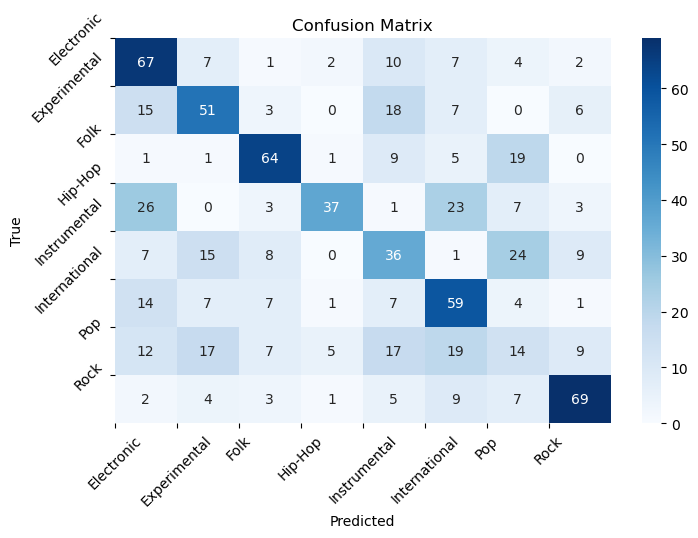

In [27]:
file_path = "../CNN2D/lightning_logs/norm_mfcc_lil_lr5em5/confusion_matrix_val.pth"

plot_confusion_matrix(file_path, move_to_cpu=True)